(data-quickstart)=
# Data Analysis Quickstart


## Introduction

Here we'll do a whistlestop tour of data analysis in Python using a structure called a *dataframe*. Dataframes do everything a spreadsheet does, and a *whole lot more*. At their simplest, dataframes are a tabular representation of data with rows and columns. The data in each column can be anything; text, numbers, Python objects such as lists or dictionaries, or even other dataframes!

The ability to extract, clean, and analyse data is one of the core skills any economist needs. Fortunately, the (open source) tools that are available for data analysis have improved enormously in recent years, and working with them can be a delight——even the most badly formatted data can be beaten into shape. You may be sceptical that these open source tools can be as powerful as the costly, closed source tools you may already know: but, over time, you'll come to see how they do far, far more, and do it faster too.

In this chapter, we'll see analysis on a *single* dataframe using the Star Wars' characters dataset as an example. For a more thorough grounding in using data, see the next chapter ({ref}`working-with-data`).

This chapter uses the [**pandas**](https://pandas.pydata.org/) and [**numpy**](https://numpy.org/) packages. If you're running this code, you may need to install these packages. The Anaconda distribution of Python comes with **pandas** and **numpy** installed. If you don't have these installed, you can install them by running either `conda install packagename` or `pip install packagename` on your computer's command line. You can find a brief guide to installing packages in {ref}`code-preliminaries`.

This chapter is hugely indebted to the fantastic [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), and both the **pandas** [documentation](https://pandas.pydata.org/docs/user_guide/index.html) and amazing [introductory tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html).

## Loading data and checking datatypes

First we must import the packages we'll be using in the rest of this chapter.

In [1]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Set seed for random numbers
seed_for_prng = 78557
prng = np.random.default_rng(seed_for_prng)  # prng=probabilistic random number generator


In [5]:
# Set seed for random numbers
seed_for_prng = 78557
prng = np.random.default_rng(seed_for_prng)  # prng=probabilistic random number generator

In [6]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
pd.set_option("display.max_rows", 20)

In [7]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
pd.set_option("display.max_rows", 20)

Loading data into a dataframe is achieved with commands like `df = pd.read_csv(...)` or `df = pd.read_stata(...)`. Let's load the Star Wars data from the internet:

In [8]:
df = (pd.read_csv(
    "https://github.com/aeturrell/coding-for-economists/raw/main/data/starwars.csv",
    index_col=0,
    )
    .dropna(subset=["species"])
    )
# Check info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 86
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        82 non-null     object 
 1   height      77 non-null     float64
 2   mass        58 non-null     float64
 3   hair_color  77 non-null     object 
 4   eye_color   80 non-null     object 
 5   gender      79 non-null     object 
 6   homeworld   74 non-null     object 
 7   species     82 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.8+ KB


In [9]:
df = (pd.read_csv(
    "https://github.com/aeturrell/coding-for-economists/raw/main/data/starwars.csv",
    index_col=0,
    )
    .dropna(subset=["species"])
    )
# Check info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 86
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        82 non-null     object 
 1   height      77 non-null     float64
 2   mass        58 non-null     float64
 3   hair_color  77 non-null     object 
 4   eye_color   80 non-null     object 
 5   gender      79 non-null     object 
 6   homeworld   74 non-null     object 
 7   species     82 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.8+ KB


### Look at the first few rows with `head()`

In [10]:
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human


```{admonition} Exercise
What happens if you pass a number to `head()`, eg `head(10)`?
```

In [11]:
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human


## Filter rows and columns with conditions using `df.loc[condition(s) or row(s), column(s)]`

`.loc` stands for location and allows you to filter (aka subset) a dataframe. `.loc` works like an index, so it always comes with square brackets, eg `df.loc[...]`.

`loc` takes two arguments. The first is a list of the names of the rows that you'd like to select *or* a condition (ie a list of booleans with the same length as the dataframe) that selects certain rows. Remember, you can easily create a series of booleans by checking a column against a condition, for example `df['column1'] == 'black'`.

The second argument consists of a list of column names you'd like to select. In both cases, `:` is shorthand for 'use all rows' or 'use all columns'. If you have *either* condition(s) *or* column(s) (but not both), you can simply write `df[condition(s)]` or `df[column(s)]`.

Here's an example with a condition built up out of two parts and a list of columns:

In [12]:
df.loc[(df["hair_color"] == "brown") & (df["eye_color"] == "blue"), ["name", "species"]]

,name,species
6,Beru Whitesun lars,Human
12,Chewbacca,Wookiee
17,Jek Tono Porkins,Human
30,Qui-Gon Jinn,Human
58,Cliegg Lars,Human
77,Tarfful,Wookiee


In [13]:
df.loc[(df["hair_color"] == "brown") & (df["eye_color"] == "blue"), ["name", "species"]]

,name,species
6,Beru Whitesun lars,Human
12,Chewbacca,Wookiee
17,Jek Tono Porkins,Human
30,Qui-Gon Jinn,Human
58,Cliegg Lars,Human
77,Tarfful,Wookiee


```{admonition} Exercise
Using `loc`, filter the dataframe to `mass` greater than 50 for the `name` and `homeworld` columns
```

In [17]:
df.loc[(df['mass'] > 50), ['name', 'homeworld']]

,name,homeworld
0,Luke Skywalker,Tatooine
1,C-3PO,Tatooine
3,Darth Vader,Tatooine
5,Owen Lars,Tatooine
6,Beru Whitesun lars,Tatooine
...,...,...
75,Shaak Ti,Shili
76,Grievous,Kalee
77,Tarfful,Kashyyyk
78,Raymus Antilles,Alderaan


In [14]:
df.loc[(df['mass'] > 50), ['name', 'homeworld']]

,name,homeworld
0,Luke Skywalker,Tatooine
1,C-3PO,Tatooine
3,Darth Vader,Tatooine
5,Owen Lars,Tatooine
6,Beru Whitesun lars,Tatooine
...,...,...
75,Shaak Ti,Shili
76,Grievous,Kalee
77,Tarfful,Kashyyyk
78,Raymus Antilles,Alderaan


## Sort rows or columns with `.sort_values()`

Use `sort_values(columns, ascending=False)` for descending order.

In [18]:
df.sort_values(["height", "mass"])

,name,height,mass,hair_color,eye_color,gender,homeworld,species
18,Yoda,66.0,17.0,white,brown,male,NaN,Yoda's species
71,Ratts Tyerell,79.0,15.0,none,NaN,male,Aleen Minor,Aleena
28,Wicket Systri Warrick,88.0,20.0,brown,brown,male,Endor,Ewok
44,Dud Bolt,94.0,45.0,none,yellow,male,Vulpter,Vulptereen
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
...,...,...,...,...,...,...,...,...
27,Arvel Crynyd,NaN,NaN,brown,brown,male,NaN,Human
81,Finn,NaN,NaN,black,dark,male,NaN,Human
82,Rey,NaN,NaN,brown,hazel,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,brown,male,NaN,Human


In [15]:
df.sort_values(["height", "mass"])

,name,height,mass,hair_color,eye_color,gender,homeworld,species
18,Yoda,66.0,17.0,white,brown,male,NaN,Yoda's species
71,Ratts Tyerell,79.0,15.0,none,NaN,male,Aleen Minor,Aleena
28,Wicket Systri Warrick,88.0,20.0,brown,brown,male,Endor,Ewok
44,Dud Bolt,94.0,45.0,none,yellow,male,Vulpter,Vulptereen
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
...,...,...,...,...,...,...,...,...
27,Arvel Crynyd,NaN,NaN,brown,brown,male,NaN,Human
81,Finn,NaN,NaN,black,dark,male,NaN,Human
82,Rey,NaN,NaN,brown,hazel,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,brown,male,NaN,Human


```{admonition} Exercise
Using `sort_values()`, sort the dataframe by the `name` column.
```

In [19]:
df.sort_values('name')

,name,height,mass,hair_color,eye_color,gender,homeworld,species
25,Ackbar,180.0,83.0,none,orange,male,Mon Cala,Mon Calamari
51,Adi Gallia,184.0,50.0,none,blue,female,Coruscant,Tholothian
10,Anakin Skywalker,188.0,84.0,blond,blue,male,Tatooine,Human
27,Arvel Crynyd,NaN,NaN,brown,brown,male,NaN,Human
43,Ayla Secura,178.0,55.0,none,hazel,female,Ryloth,Twi'lek
...,...,...,...,...,...,...,...,...
28,Wicket Systri Warrick,88.0,20.0,brown,brown,male,Endor,Ewok
11,Wilhuff Tarkin,180.0,NaN,"auburn, grey",blue,male,Eriadu,Human
53,Yarael Poof,264.0,NaN,none,yellow,male,Quermia,Quermian
18,Yoda,66.0,17.0,white,brown,male,NaN,Yoda's species


In [16]:
df.sort_values('name')

,name,height,mass,hair_color,eye_color,gender,homeworld,species
25,Ackbar,180.0,83.0,none,orange,male,Mon Cala,Mon Calamari
51,Adi Gallia,184.0,50.0,none,blue,female,Coruscant,Tholothian
10,Anakin Skywalker,188.0,84.0,blond,blue,male,Tatooine,Human
27,Arvel Crynyd,NaN,NaN,brown,brown,male,NaN,Human
43,Ayla Secura,178.0,55.0,none,hazel,female,Ryloth,Twi'lek
...,...,...,...,...,...,...,...,...
28,Wicket Systri Warrick,88.0,20.0,brown,brown,male,Endor,Ewok
11,Wilhuff Tarkin,180.0,NaN,"auburn, grey",blue,male,Eriadu,Human
53,Yarael Poof,264.0,NaN,none,yellow,male,Quermia,Quermian
18,Yoda,66.0,17.0,white,brown,male,NaN,Yoda's species


## Choose multiple rows or columns using slices

Slices can be passed by name using `.loc[startrow:stoprow:step, startcolumn:stopcolumn:step]` or by position using `.iloc[start:stop:step, start:stop:step]`.

Choosing every 10th row from the second, and the columns between 'name' and 'gender':

In [20]:
df.loc[2::10, "name":"gender"]

,name,height,mass,hair_color,eye_color,gender
2,R2-D2,96.0,32.0,NaN,red,NaN
12,Chewbacca,228.0,112.0,brown,blue,male
22,Bossk,190.0,113.0,none,red,male
32,Finis Valorum,170.0,NaN,blond,blue,male
44,Dud Bolt,94.0,45.0,none,yellow,male
54,Plo Koon,188.0,80.0,none,black,male
64,Bail Prestor Organa,191.0,NaN,black,brown,male
75,Shaak Ti,178.0,57.0,none,black,female


In [17]:
df.loc[2::10, "name":"gender"]

,name,height,mass,hair_color,eye_color,gender
2,R2-D2,96.0,32.0,NaN,red,NaN
12,Chewbacca,228.0,112.0,brown,blue,male
22,Bossk,190.0,113.0,none,red,male
32,Finis Valorum,170.0,NaN,blond,blue,male
44,Dud Bolt,94.0,45.0,none,yellow,male
54,Plo Koon,188.0,80.0,none,black,male
64,Bail Prestor Organa,191.0,NaN,black,brown,male
75,Shaak Ti,178.0,57.0,none,black,female


Note that `loc` only works here with numbers for rows because it just so happens that the names of the rows *are* numbers. If the rows had names that were strings, and we wanted to subset rows by their index position, we would have to use `iloc` instead.

Choosing the first 5 rows and the last 2 columns by index position:

In [21]:
df.iloc[:5, -2:]

,homeworld,species
0,Tatooine,Human
1,Tatooine,Droid
2,Naboo,Droid
3,Tatooine,Human
4,Alderaan,Human


In [18]:
df.iloc[:5, -2:]

,homeworld,species
0,Tatooine,Human
1,Tatooine,Droid
2,Naboo,Droid
3,Tatooine,Human
4,Alderaan,Human


```{admonition} Exercise
Using `.iloc`, display the first 6 rows and last 6 columns.
```

In [22]:
df.iloc[:6, -6:]

,mass,hair_color,eye_color,gender,homeworld,species
0,77.0,blond,blue,male,Tatooine,Human
1,75.0,NaN,yellow,NaN,Tatooine,Droid
2,32.0,NaN,red,NaN,Naboo,Droid
3,136.0,none,yellow,male,Tatooine,Human
4,49.0,brown,brown,female,Alderaan,Human
5,120.0,"brown, grey",blue,male,Tatooine,Human


In [19]:
df.iloc[:6, -6:]

,mass,hair_color,eye_color,gender,homeworld,species
0,77.0,blond,blue,male,Tatooine,Human
1,75.0,NaN,yellow,NaN,Tatooine,Droid
2,32.0,NaN,red,NaN,Naboo,Droid
3,136.0,none,yellow,male,Tatooine,Human
4,49.0,brown,brown,female,Alderaan,Human
5,120.0,"brown, grey",blue,male,Tatooine,Human


## Randomly selecting a sample using `.sample`

`.sample(n)` randomly selects `n` rows, `.sample(frac=0.4)` selects 40% of the data, `replace=True` samples with replacement, and passing `weights=` selects a number or fraction with the probabilities given by the passed weights. (Note that weights passed should have the same length as the dataframe.)

Taking a sample of 5 rows:

In [23]:
df.sample(5)

,name,height,mass,hair_color,eye_color,gender,homeworld,species
69,Taun We,213.0,NaN,none,black,female,Kamino,Kaminoan
59,Poggle the Lesser,183.0,80.0,none,yellow,male,Geonosis,Geonosian
65,Jango Fett,183.0,79.0,black,brown,male,Concord Dawn,Human
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
22,Bossk,190.0,113.0,none,red,male,Trandosha,Trandoshan


In [20]:
df.sample(5)

,name,height,mass,hair_color,eye_color,gender,homeworld,species
6,Beru Whitesun lars,165.0,75.0,brown,blue,female,Tatooine,Human
70,Jocasta Nu,167.0,NaN,white,blue,female,Coruscant,Human
80,Tion Medon,206.0,80.0,none,black,male,Utapau,Pau'an
57,Cordé,157.0,NaN,brown,brown,female,Naboo,Human
71,Ratts Tyerell,79.0,15.0,none,NaN,male,Aleen Minor,Aleena


```{admonition} Exercise
Use `.sample()` to sample 5% of the dataframe.
```

In [24]:
df.sample(frac=0.05)

,name,height,mass,hair_color,eye_color,gender,homeworld,species
24,Lobot,175.0,79.0,none,blue,male,Bespin,Human
66,Zam Wesell,168.0,55.0,blonde,yellow,female,Zolan,Clawdite
23,Lando Calrissian,177.0,79.0,black,brown,male,Socorro,Human
64,Bail Prestor Organa,191.0,NaN,black,brown,male,Alderaan,Human


## Rename with `.rename()`

You can rename all columns by passing a function, for instance `df.rename(columns=str.lower)` to put all columns in lower case. Alternatively, use a dictionary to say which columns should be mapped to what:

In [9]:
df.rename(columns={"homeworld": "home_world"})

,name,height,mass,hair_color,eye_color,gender,home_world,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human
...,...,...,...,...,...,...,...,...
81,Finn,NaN,NaN,black,dark,male,NaN,Human
82,Rey,NaN,NaN,brown,hazel,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,brown,male,NaN,Human
84,BB8,NaN,NaN,none,black,none,NaN,Droid


In [10]:
df.rename(columns={"homeworld": "home_world"})

,name,height,mass,hair_color,eye_color,gender,home_world,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human
...,...,...,...,...,...,...,...,...
81,Finn,NaN,NaN,black,dark,male,NaN,Human
82,Rey,NaN,NaN,brown,hazel,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,brown,male,NaN,Human
84,BB8,NaN,NaN,none,black,none,NaN,Droid


## Add new columns with `.assign()` or assignment

Very often you will want to create new columns based on existing columns.

![](https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg)

There are two ways to do this. Let's see them both with an example where we'd like to create a new column that contains height in metres, called `"height_m:`.

- The first, and most commonly used, is called *assignment* and involves just entering the new column name within your dataframe and putting it on the left-hand side of an assignment expression that has an operation based on existing dataframe columns on the right-hand side. For example, `df['height_m'] = df['height']/100`.
- The second is to use the `assign()` method on a dataframe directly. In this case, the assignment statement appears inside the brackets but you don't need to write as much text because it's clear from the context that, on the left-hand side of the assignment, we're talking about the given dataframe. An example is `df.assign(height_m=df["height"] / 100)`.

Let's see working examples of both of these assignment methods.

First let's use the assignment approach:

In [25]:
df['height_m'] = df['height']/100
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50


In [12]:
df['height_m'] = df['height']/100
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50


And now with the `.assign()` function:

In [26]:
df = df.assign(height_m=df["height"] / 100)
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50


In [13]:
df = df.assign(height_m=df["height"] / 100)
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50


This was added to the end; ideally, we'd like it next to the height column, which we can achieve by sorting the columns (`axis=1`) alphabetically:

In [27]:
(df.assign(height_m=df["height"] / 100).sort_index(axis=1))

,eye_color,gender,hair_color,height,height_m,homeworld,mass,name,species
0,blue,male,blond,172.0,1.72,Tatooine,77.0,Luke Skywalker,Human
1,yellow,NaN,NaN,167.0,1.67,Tatooine,75.0,C-3PO,Droid
2,red,NaN,NaN,96.0,0.96,Naboo,32.0,R2-D2,Droid
3,yellow,male,none,202.0,2.02,Tatooine,136.0,Darth Vader,Human
4,brown,female,brown,150.0,1.50,Alderaan,49.0,Leia Organa,Human
...,...,...,...,...,...,...,...,...,...
81,dark,male,black,NaN,NaN,NaN,NaN,Finn,Human
82,hazel,female,brown,NaN,NaN,NaN,NaN,Rey,Human
83,brown,male,brown,NaN,NaN,NaN,NaN,Poe Dameron,Human
84,black,none,none,NaN,NaN,NaN,NaN,BB8,Droid


In [14]:
(df.assign(height_m=df["height"] / 100).sort_index(axis=1))

,eye_color,gender,hair_color,height,height_m,homeworld,mass,name,species
0,blue,male,blond,172.0,1.72,Tatooine,77.0,Luke Skywalker,Human
1,yellow,NaN,NaN,167.0,1.67,Tatooine,75.0,C-3PO,Droid
2,red,NaN,NaN,96.0,0.96,Naboo,32.0,R2-D2,Droid
3,yellow,male,none,202.0,2.02,Tatooine,136.0,Darth Vader,Human
4,brown,female,brown,150.0,1.50,Alderaan,49.0,Leia Organa,Human
...,...,...,...,...,...,...,...,...,...
81,dark,male,black,NaN,NaN,NaN,NaN,Finn,Human
82,hazel,female,brown,NaN,NaN,NaN,NaN,Rey,Human
83,brown,male,brown,NaN,NaN,NaN,NaN,Poe Dameron,Human
84,black,none,none,NaN,NaN,NaN,NaN,BB8,Droid


To overwrite existing columns just use `height = df['height']/100` with the `assign` method or `df['height'] = df['height']/100` with an assignment expression.

```{admonition} Exercise
Add a new column that gives the ratio of mass to height.
```

In [30]:
df['mass_height_ratio'] = df['mass'] / df['height']
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m,mass_height_ratio
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72,0.447674
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67,0.449102
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96,0.333333
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02,0.673267
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50,0.326667


In [15]:
df['mass_height_ratio'] = df['mass'] / df['height']
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m,mass_height_ratio
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72,0.447674
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67,0.449102
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96,0.333333
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02,0.673267
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50,0.326667


In [29]:
df = df.assign(mass_height_ratio=df['mass'] / df['height'])
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m,mass_height_ratio
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72,0.447674
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67,0.449102
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96,0.333333
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02,0.673267
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50,0.326667


In [16]:
df = df.assign(mass_height_ratio=df['mass'] / df['height'])
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m,mass_height_ratio
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72,0.447674
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67,0.449102
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96,0.333333
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02,0.673267
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50,0.326667


## Summarise numerical values with `.describe()`



In [31]:
df.describe()

,height,mass,height_m,mass_height_ratio
count,77.000000,58.000000,77.000000,58.000000
mean,175.103896,98.162069,1.751039,0.552307
std,34.483629,170.810183,0.344836,0.969546
min,66.000000,15.000000,0.660000,0.189873
25%,167.000000,56.400000,1.670000,0.341837
50%,180.000000,79.000000,1.800000,0.434426
75%,191.000000,84.750000,1.910000,0.459349
max,264.000000,1358.000000,2.640000,7.760000


In [17]:
df.describe()

,height,mass,height_m,mass_height_ratio
count,77.000000,58.000000,77.000000,58.000000
mean,175.103896,98.162069,1.751039,0.552307
std,34.483629,170.810183,0.344836,0.969546
min,66.000000,15.000000,0.660000,0.189873
25%,167.000000,56.400000,1.670000,0.341837
50%,180.000000,79.000000,1.800000,0.434426
75%,191.000000,84.750000,1.910000,0.459349
max,264.000000,1358.000000,2.640000,7.760000


## Group variables values with `.groupby()`



In [32]:
df.groupby("species")[["height", "mass"]].mean()

,height,mass
species,,
Aleena,79.0,15.0
Besalisk,198.0,102.0
Cerean,198.0,82.0
Chagrian,196.0,NaN
Clawdite,168.0,55.0
...,...,...
Vulptereen,94.0,45.0
Wookiee,231.0,124.0
Xexto,122.0,NaN


In [18]:
df.groupby("species")[["height", "mass"]].mean()

,height,mass
species,,
Aleena,79.0,15.0
Besalisk,198.0,102.0
Cerean,198.0,82.0
Chagrian,196.0,NaN
Clawdite,168.0,55.0
...,...,...
Vulptereen,94.0,45.0
Wookiee,231.0,124.0
Xexto,122.0,NaN


```{admonition} Exercise
Find the standard deviation (using `std()`) of masses by `homeworld`.
```

In [19]:
df.groupby('homeworld')['mass'].std()

homeworld
Alderaan          21.213203
Aleen Minor             NaN
Bespin                  NaN
Bestine IV              NaN
Cato Neimoidia          NaN
                    ...    
Troiken                 NaN
Tund                    NaN
Utapau                  NaN
Vulpter                 NaN
Zolan                   NaN
Name: mass, Length: 47, dtype: float64

In [20]:
df.groupby('homeworld')['mass'].std()

homeworld
Alderaan          21.213203
Aleen Minor             NaN
Bespin                  NaN
Bestine IV              NaN
Cato Neimoidia          NaN
                    ...    
Troiken                 NaN
Tund                    NaN
Utapau                  NaN
Vulpter                 NaN
Zolan                   NaN
Name: mass, Length: 47, dtype: float64

## Add transformed columns using `.transform()`

Quite often, it's useful to put a column into a dataframe that is the result of an intermediate groupby and aggregation. For example, subtracting the group mean or normalisation. Transform does this and *returns a transformed column with the same shape as the original dataframe*. Transform preserves the original index. (There are other methods, such as apply, that return a new dataframe with the groupby variables as a new index.)

Below is an example of transform being used to demean a variable according to the mean by species. Note that we are using lambda functions here. Lambda functions are a quick way of writing functions without needing to give them a name, e.g. `lambda x: x+1` defines a function that adds one to x. In the example below, the `x` in the lambda function takes on the role of mass grouped by species.

In [34]:
df["mass_demean_species"] = df.groupby("species")["mass"].transform(lambda x: x - x.mean())
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m,mass_height_ratio,mass_demean_species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72,0.447674,-5.781818
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67,0.449102,5.250000
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96,0.333333,-37.750000
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02,0.673267,53.218182
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50,0.326667,-33.781818


In [21]:
df["mass_demean_species"] = df.groupby("species")["mass"].transform(lambda x: x - x.mean())
df.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species,height_m,mass_height_ratio,mass_demean_species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human,1.72,0.447674,-5.781818
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid,1.67,0.449102,5.250000
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid,0.96,0.333333,-37.750000
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human,2.02,0.673267,53.218182
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human,1.50,0.326667,-33.781818


```{admonition} Exercise
Create a `height_demean_homeworld` column that gives the height column with the mean height by homeworld subtracted.
```

## Make quick charts with `.plot.*()`

Including scatter, area, bar, box, density, hexbin, histogram, kde, and line.

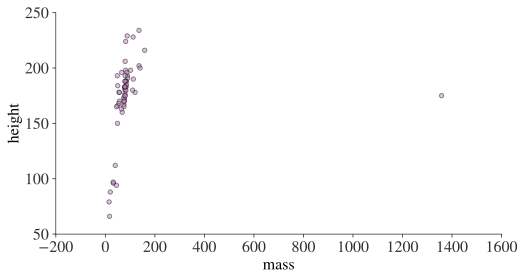

In [42]:
df.plot.scatter("mass", "height", alpha=0.5);

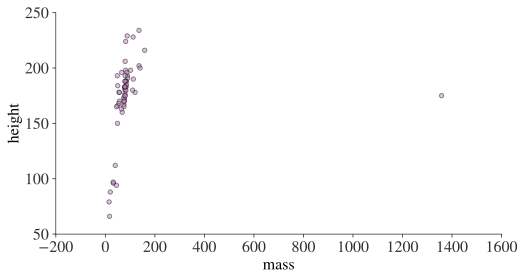

In [22]:
df.plot.scatter("mass", "height", alpha=0.5);

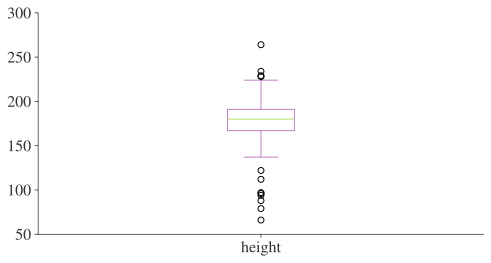

In [43]:
df.plot.box(column="height");

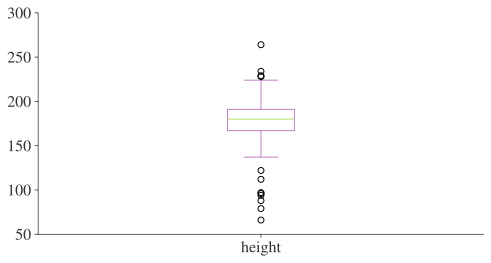

In [23]:
df.plot.box(column="height");

In [25]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


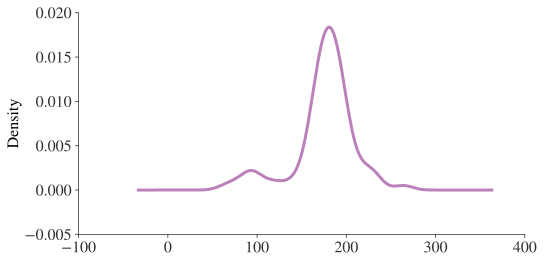

In [46]:
df["height"].plot.kde(bw_method=0.3);

## Export results and descriptive statistics

You'll often want to export your results to a latex file for inclusion in a paper, presentation, or poster. Let's say we had some descriptive statistics on a dataframe:

In [48]:
table = df[["mass", "height"]].agg(['mean', 'std'])
table

,mass,height
mean,98.162069,175.103896
std,170.810183,34.483629


In [26]:
table = df[["mass", "height"]].agg(['mean', 'std'])
table

,mass,height
mean,98.162069,175.103896
std,170.810183,34.483629


You can export this to a range of formats, including string, html, xml, markdown, the *clipboard* (so you can paste it), Excel, and more. In your favourite IDE (integrated development environment) with a Python language server (eg Visual Studio Code, JupyterLab) start typing `table.to` and a list of possible methods beginning `to` should appear, including `to_string()`.

Here is an example of exporting your **pandas** table to CSV (comma separated values):

In [49]:
table.to_csv()

',mass,height\nmean,98.16206896551724,175.1038961038961\nstd,170.81018276436322,34.483628615842896\n'

In [27]:
table.to_csv()

',mass,height\r\nmean,98.16206896551724,175.1038961038961\r\nstd,170.8101827643632,34.483628615842896\r\n'

One output format that doesn't conform to this is *LaTeX*, for which you need the following:

Writing to the terminal isn't that useful for getting your paper or report done! To export to a file, use `table.style.to_latex('file.tex', ...)` for LaTeX and `table.to_csv('file.csv', ...)`.

```{admonition} Exercise
Try exporting the table above using the `to_string("table.txt")` method.

If you are running this locally, the file should appear in the directory in which you are running this notebook.

If you are using Google Colab to do these exercises, you can check that the file exported by running `!ls` in a new code cell to see all files in the current notebook directory. To get the contents of the file you created, run `!cat table.txt`.
```

## Summary

This has been a quick tour of what **pandas** can do, and shows the power of this ubiquitous tool, but we've barely seen a fraction of its features. The next chapter will go deeper into how to use **pandas**.